# Previsão de Aprovação de Cartão de Crédito: Um Estudo de Machine Learning para Mitigação de Riscos Financeiros

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/02%20Algoritmos%2C%20modelos%20e%20m%C3%A9tricas/Credit%20Card%20Approval%20Prediction/image/Capa.png" alt="capa">

---

# **Machine Learning** • Credit Card Approval Prediction

Bem-vindo(a)!!! Meu nome é Enzo Schitini, sou cientista de dados e neste projeto de "Previsão de Aprovação de Cartão de Crédito", utilizamos técnicas de machine learning para desenvolver um modelo capaz de prever a aprovação ou rejeição de solicitações de cartão de crédito. Analisamos dados históricos de clientes, incluindo informações demográficas e financeiras, para identificar padrões que influenciam a decisão de aprovação. 

Nosso objetivo é fornecer às instituições financeiras uma ferramenta precisa para minimizar riscos de crédito e otimizar o processo de concessão, assegurando que apenas clientes qualificados sejam aprovados.

**Data Science** Portfólio | *03 Agosto 2024*

[Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

## O que você vai encontrar neste notebook? 👋

Vamos explorar os dados do *Sistema de Informação sobre Nascidos Vivos (SINASC)* relativos aos recém-nascidos nascidos no estado de Rondônia, Brasil, no ano de 2019. Assim que a análise exploratória for concluída, prosseguiremos para `identificar insights` e avaliar a saúde pública no estado. 

Usaremos `abordagens estatísticas e analíticas para identificar correlações`, padrões e associações entre variáveis, além disso vamos criar um `Modelo de Machine Learning` para fazer inferências de dados faltantes. 

#### Os pilares da análise:

- Descobrir os fatores que influenciam a saúde dos bebês.
- Entender melhor as raças e o nível educacional das mães.
- Analisaremos as menores de idade, meninas que constroem família antes dos 18 anos.
- O que nos diz a escolha do parto entre cesariana ou parto vaginal?
- E finalmente melhor compreender a população do estado de Rondônia no Brasil em 2019 e construir a um pouco do que seria o 'Rosto da população'.

*Além disso, exploraremos o impacto das variáveis ​​sociorraciais nas condições de nascimento e nos indivíduos*

#### - *Contexto dos Dados*

Com o aumento do uso de cartões de crédito, é essencial que as instituições financeiras possam tomar decisões informadas sobre a concessão de crédito. Uma decisão inadequada pode resultar em perdas financeiras significativas, seja pela concessão de crédito a clientes com alta probabilidade de inadimplência, ou pela rejeição de clientes com bom potencial de crédito. A utilização de técnicas de machine learning pode transformar a forma como essas decisões são feitas, tornando o processo mais eficiente e preciso.

#### - *Origem dos Dados*

<img src="" alt="capa" width="310">

> Você pode acessar os dados pelo [kaggle](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction)

#### - *Metodologia*

A análise será conduzida utilizando técnicas estatísticas e de visualização de dados para identificar padrões e anomalias. Será empregado o Python como ferramentas de manipulação e análise dos dados, na limpeza e preparação dos dados para garantir a qualidade das análises e do modelo de Machine Learning.

#### - *Importância do Projeto*

# 🔥 Vamos começar!!!

### **`Tópicos`**

<ol type="1">
  <li>Preparação do ambiente de desenvolvimento</li>
  <li>Estrutura e tratamento dos dados e colunas</li>
  <li>Visualização</li>
  <li>Métricas</li>
  <li>✨ Insights ✨</li>
</ol>

---

# Preparação do ambiente de desenvolvimento

### Importando os pacotes

In [71]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy.stats import chi2_contingency

import missingno as msno
pd.set_option('display.max_columns', None)

### Códigos em python

### Funções que vamos usar para gerar os gráficos da análise

In [72]:
def Heatmap_Default():
    pass

### Carregando os Datasets

In [73]:
df = pd.read_csv('Data/Credit Card Approval Prediction.csv').drop(columns=['Unnamed: 0', 'ID'])
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Default
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


# Análise Exploratória

Na minha opinião, a análise exploratória é uma das fases mais importantes de qualquer projeto que lide com dados. Aqui o objetivo é entender o contexto em que trabalharemos e como são os dados que temos que explorar, para termos toda uma documentação que precisaremos para criar os próximos algoritmos, mesmo os de Machine Learning. Acredito que mesmo nesta fase já podemos encontrar alguns Insights.

## Estrutura e tratamento dos dados e colunas

In [74]:
df.drop_duplicates(inplace=True)

In [75]:
def status_dataframe(dataframe:pd.DataFrame):
    df_columns_name = dataframe.columns.to_list()

    types_list = [str(type(dataframe[col][0])).split("'")[1] for col in dataframe.columns]
    lista_categorias = [dataframe[col].nunique() for col in dataframe.columns]

    elementos_nulos = elementos_nulos = dataframe.isnull().sum()
    elementos_nulos = elementos_nulos.to_list()

    percentagem_dados_nulos = round((dataframe.isnull().sum() / dataframe.shape[0]) * 100)
    percentagem_dados_nulos = percentagem_dados_nulos.to_list()

    print(f'Esse datafame contém {dataframe.shape[1]} colunas e {dataframe.shape[0]} linhas')

    dados_status = pd.DataFrame({'Nome': df_columns_name, 
                            'Tipo': types_list, 
                            'qnt_categorias': lista_categorias,
                            'Dados nulos' : elementos_nulos,
                            'Dados nulos %' : percentagem_dados_nulos})
    return dados_status

display(status_dataframe(df))
display(df.head())

Esse datafame contém 18 colunas e 95027 linhas


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %
0,CODE_GENDER,str,2,0,0.0
1,FLAG_OWN_CAR,str,2,0,0.0
2,FLAG_OWN_REALTY,str,2,0,0.0
3,CNT_CHILDREN,numpy.int64,12,0,0.0
4,AMT_INCOME_TOTAL,numpy.float64,866,0,0.0
5,NAME_INCOME_TYPE,str,5,0,0.0
6,NAME_EDUCATION_TYPE,str,5,0,0.0
7,NAME_FAMILY_STATUS,str,5,0,0.0
8,NAME_HOUSING_TYPE,str,6,0,0.0
9,DAYS_BIRTH,numpy.int64,16379,0,0.0


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Default
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
7,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,1


## **Análise das colunas do dataset:**

O dataset parece conter informações sobre clientes de um banco, com foco em dados demográficos, financeiros e de trabalho, além de uma coluna que indica se o cliente teve ou não um default (inadimplência) em seus pagamentos. Vamos analisar cada coluna:

---

**1. Variáveis Demográficas:**

- **CODE_GENDER:**  Gênero do cliente (M - Masculino, F - Feminino)
- **FLAG*OWN*CAR:** Indica se o cliente possui carro (Y - Sim, N - Não)
- **FLAG*OWN*REALTY:** Indica se o cliente possui imóvel próprio (Y - Sim, N - Não)
- **CNT_CHILDREN:** Número de filhos do cliente
- **DAYS_BIRTH:** Número de dias desde o nascimento do cliente. (Valores negativos indicam que o cliente nasceu antes da data de referência, provavelmente a data da coleta dos dados)
- **CNT*FAM*MEMBERS:** Número de membros da família do cliente

---

**2. Variáveis Financeiras:**

- **AMT*INCOME*TOTAL:** Renda total anual do cliente.

---

**3. Variáveis de Trabalho:**

- **NAME*INCOME*TYPE:** Tipo de renda do cliente (ex: Working, Commercial associate, Pensioner)
- **NAME*EDUCATION*TYPE:** Nível de escolaridade do cliente (ex: Higher education, Secondary / secondary special)
- **NAME*FAMILY*STATUS:** Estado civil do cliente (ex: Married, Single / not married, Civil marriage)
- **NAME*HOUSING*TYPE:** Tipo de moradia do cliente (ex: House / apartment, Rented apartment, With parents)
- **DAYS_EMPLOYED:** Número de dias desde o início do emprego atual do cliente. (Valores negativos indicam que o cliente está empregado antes da data de referência, provavelmente a data da coleta dos dados)

---

**4. Variáveis de Comunicação:**

- **FLAG_MOBIL:** Indica se o cliente possui telefone móvel (1 - Sim, 0 - Não)
- **FLAG*WORK*PHONE:** Indica se o cliente possui telefone comercial (1 - Sim, 0 - Não)
- **FLAG_PHONE:** Indica se o cliente possui telefone fixo (1 - Sim, 0 - Não)
- **FLAG_EMAIL:** Indica se o cliente possui email (1 - Sim, 0 - Não)

---

**5. Variável de Ocupação:**

- **OCCUPATION_TYPE:** Tipo de ocupação do cliente (ex: Security staff, Sales staff, etc.)

---

**6. Variável Alvo:**

- ***Default:**  Indica se o cliente teve* default* (inadimplência) em seus pagamentos (1 - Sim, 0 - Não)

---

## Dados faltantes

<Axes: >

C:\Users\Enzo Schitni\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\Enzo Schitni\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


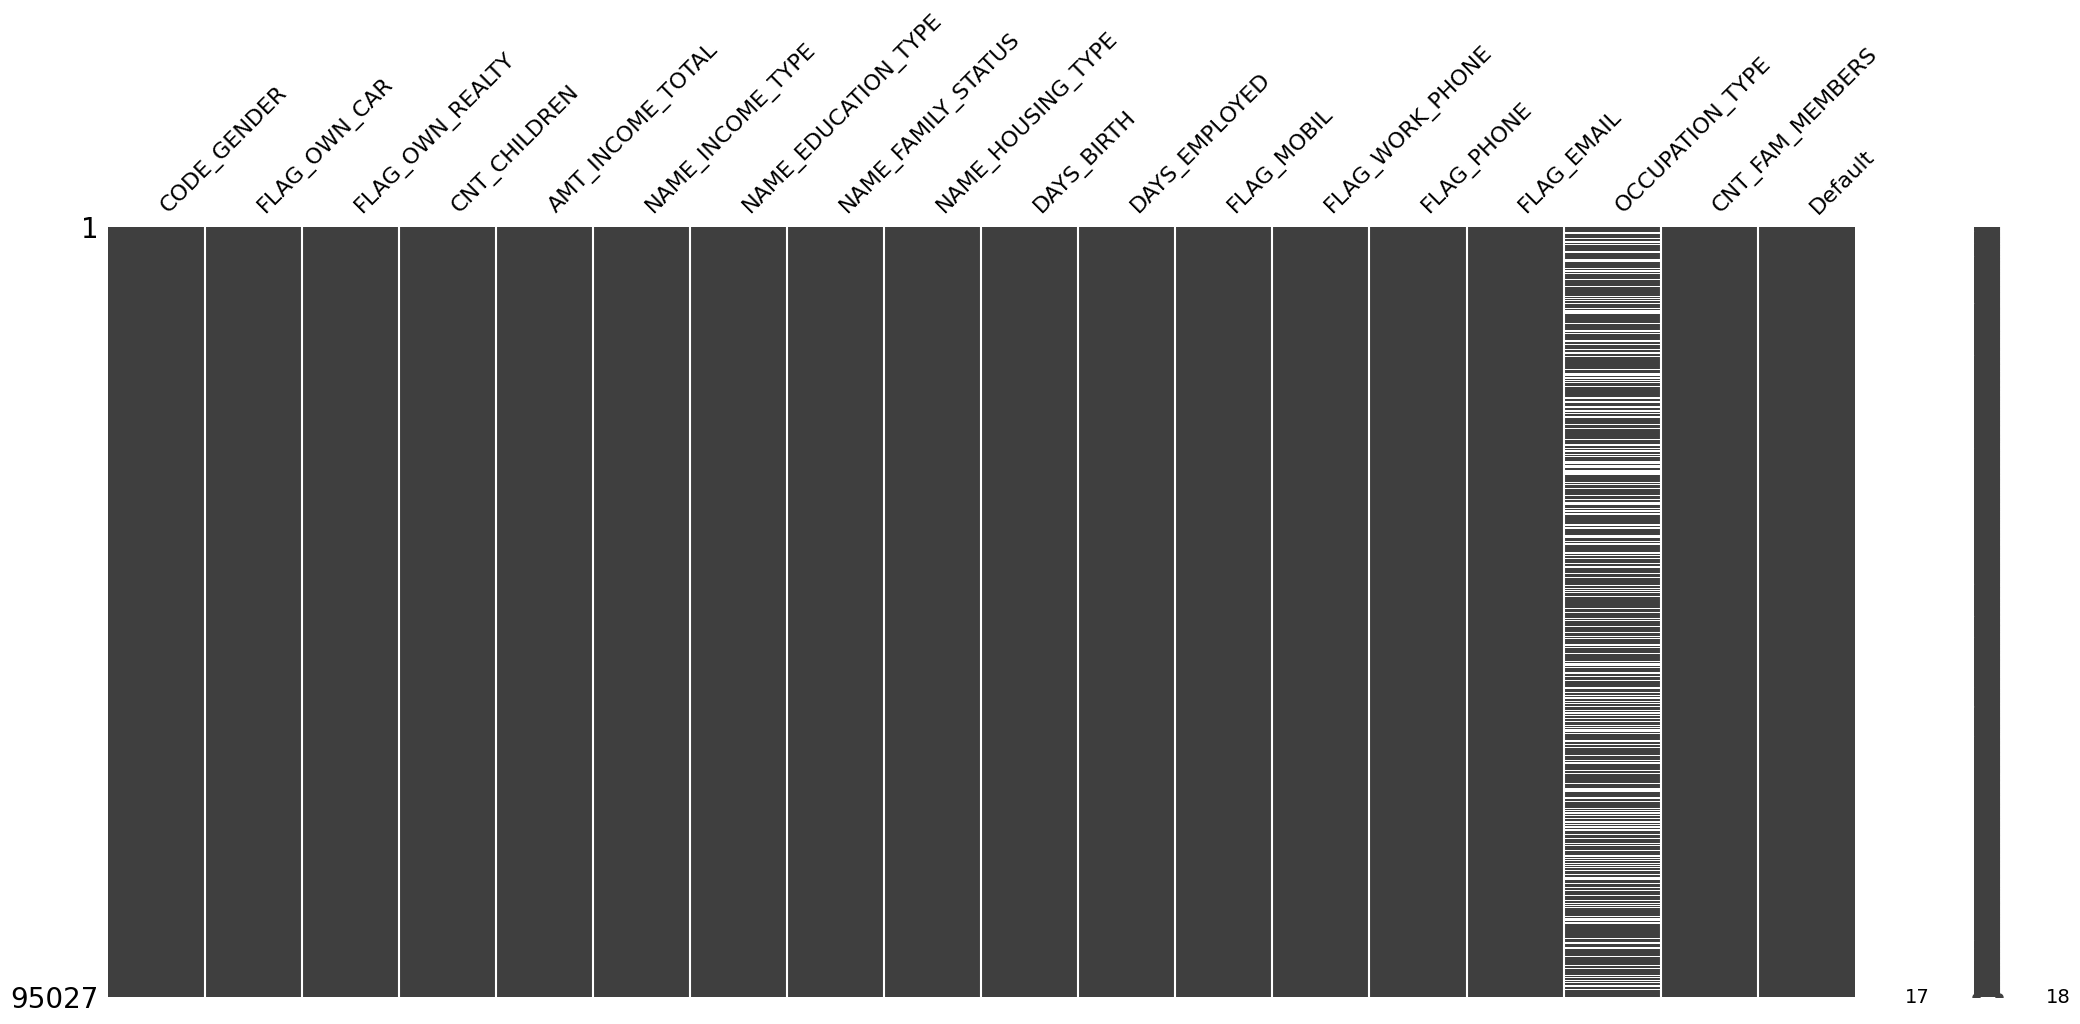

In [76]:
msno.matrix(df)

---

**5. Variável de Ocupação:**

- **OCCUPATION_TYPE:** Tipo de ocupação do cliente (ex: Security staff, Sales staff, etc.)

| Nome                 | Tipo           | qnt_categorias | Dados nulos | Dados nulos % |
|----------------------|----------------|----------------|-------------|---------------|
| OCCUPATION_TYPE      | float          | 18             | 28967       | 30.0          |

Esta coluna contém 30% dos dados nulos e eles estão bastante espalhados pelo conjunto de dados
---

### Se apagarmos essas coluna e linhas?

In [77]:
# Remover linhas com valores nulos:
df_linha_OCCUPATION_TYPE = df.dropna()
print(df_linha_OCCUPATION_TYPE.shape)

# Remover colunas com valores nulos:
df_coluna_OCCUPATION_TYPE = df.dropna(axis=1)
print(df_coluna_OCCUPATION_TYPE.shape)

(66060, 18)
(95027, 17)


### O que podemos fazer quanto aos dados nulos?

In [78]:
pd.DataFrame(round(df['OCCUPATION_TYPE'].value_counts(normalize=True) * 100))

,proportion
OCCUPATION_TYPE,
Laborers,27.0
Sales staff,14.0
Core staff,13.0
Managers,11.0
Drivers,9.0
High skill tech staff,5.0
Accountants,5.0
Medicine staff,4.0
Cooking staff,3.0


## Engenharia de atributos
Com base nas colunas existentes, podemos criar novas colunas (atributos) para melhorar a qualidade dos dados e aprimorar o modelo de machine learning:

**1. Transformando Datas em Informações Úteis:**

- **AGE:** Criar uma coluna 'AGE' calculando a idade do cliente a partir de `DAYS_BIRTH` (dividindo por 365).
- **YEARS*EMPLOYED:** Criar uma coluna 'YEARS*EMPLOYED' calculando o tempo de emprego do cliente a partir de `DAYS_EMPLOYED` (dividindo por 365).
- **AGE*AT*EMPLOYMENT:** Criar uma coluna calculando a idade do cliente no momento em que ele começou a trabalhar (AGE - YEARS_EMPLOYED).

In [79]:
df['AGE'] = round(abs(df['DAYS_BIRTH'] / 365))
df['AGE'] = df['AGE'].astype(int)

In [80]:
df['YEARS_EMPLOYED'] = round(abs(df['DAYS_EMPLOYED'] / 365))
df['YEARS_EMPLOYED'] = df['YEARS_EMPLOYED'].astype(int)

In [81]:
df['AGEATEMPLOYMENT'] = df['AGE'] - df['YEARS_EMPLOYED']

**2. Combinando Variáveis Categoricas:**

- **INCOME*TYPE*EDUCATION:** Criar uma coluna combinando `NAME[i]INCOME[/i]TYPE` e `NAME[i]EDUCATION[/i]TYPE`, para identificar grupos de clientes com características semelhantes.

**3. Criando Indicadores Financeiros:**

- **INCOME*PER*FAMILY*MEMBER:** Criar uma coluna calculando a renda per capita da família, dividindo* `AMT` INCOME[i]TOTAL *por* `CNT` FAM_MEMBERS
- **INCOME*RATIO*TO_CHILDREN:** Criar uma coluna calculando a razão entre a renda total e o número de filhos, para identificar o peso da renda familiar por filho.

In [82]:
df['INCOMEPERFAMILY_MEMBER'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']

In [83]:
df['INCOMERATIOTO_CHILDREN'] = df['AMT_INCOME_TOTAL'] / df['CNT_CHILDREN']

**4. Criando Indicadores de Perfil:**

- **HAS*EMAIL*AND_PHONE:** Criar uma coluna que indique se o cliente possui email e telefone, para identificar clientes com maior conectividade.

In [84]:
def HASEMAILAND_PHONE(valor1, valor2):
    if valor1 == 1 and valor2 == 1:
        return 1
    else:
        return 0

df['HASEMAILAND_PHONE'] = df.apply(lambda row: HASEMAILAND_PHONE(row['FLAG_EMAIL'], row['FLAG_PHONE']), axis=1)

**5. Criando Indicadores de Risco:**

- ***AGEATDEFAULT:** Criar uma coluna calculando a idade do cliente no momento do* default
- ***YEARSEMPLOYEDAT_DEFAULT:** Criar uma coluna calculando o tempo de emprego do cliente no momento do* default

### Ordenando as colunas

In [85]:
df = df[[
    # 1. Variáveis Demográficas:
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'DAYS_BIRTH', 'CNT_FAM_MEMBERS', 'AGE', 'AGEATEMPLOYMENT',

    # 2. Variáveis Financeiras:
    'AMT_INCOME_TOTAL', 'INCOMEPERFAMILY_MEMBER', 'INCOMERATIOTO_CHILDREN',

    # 3. Variáveis de Trabalho:
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
    'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED', 'YEARS_EMPLOYED', 'OCCUPATION_TYPE',

    # 4. Variáveis de Comunicação:
    'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'HASEMAILAND_PHONE',

    # 5. Variável de Ocupação:
    'Default'
    ]]

df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,DAYS_BIRTH,CNT_FAM_MEMBERS,AGE,AGEATEMPLOYMENT,AMT_INCOME_TOTAL,INCOMEPERFAMILY_MEMBER,INCOMERATIOTO_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,YEARS_EMPLOYED,OCCUPATION_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,HASEMAILAND_PHONE,Default
0,M,Y,Y,0,-12005,2.0,33,21,427500.0,213750.0,inf,Working,Higher education,Civil marriage,Rented apartment,-4542,12,NaN,1,1,0,0,0,1
2,M,Y,Y,0,-21474,2.0,59,56,112500.0,56250.0,inf,Working,Secondary / secondary special,Married,House / apartment,-1134,3,Security staff,1,0,0,0,0,1
3,F,N,Y,0,-19110,1.0,52,44,270000.0,270000.0,inf,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,8,Sales staff,1,0,1,1,1,1
4,F,N,Y,0,-19110,1.0,52,44,270000.0,270000.0,inf,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,8,Sales staff,1,0,1,1,1,0
7,F,N,Y,0,-22464,1.0,62,-939,283500.0,283500.0,inf,Pensioner,Higher education,Separated,House / apartment,365243,1001,NaN,1,0,0,0,0,1


## Reparando as colunas do data frame
Para cada coluna de nossos conjuntos de dados, transformaremos agora aquelas que são do tipo str para category. Desta forma podemos economizar espaço de memória e ter melhor desempenho na execução do algoritmo

In [86]:
category_list = list(df.select_dtypes('object').columns)
pd.DataFrame(df.select_dtypes('object').columns)

,0
0,CODE_GENDER
1,FLAG_OWN_CAR
2,FLAG_OWN_REALTY
3,NAME_INCOME_TYPE
4,NAME_EDUCATION_TYPE
5,NAME_FAMILY_STATUS
6,NAME_HOUSING_TYPE
7,OCCUPATION_TYPE


In [87]:
for col in category_list:
    df[col] = df[col].astype('category')

In [88]:
pd.DataFrame(df.dtypes)

,0
CODE_GENDER,category
FLAG_OWN_CAR,category
FLAG_OWN_REALTY,category
CNT_CHILDREN,int64
DAYS_BIRTH,int64
CNT_FAM_MEMBERS,float64
AGE,int32
AGEATEMPLOYMENT,int32
AMT_INCOME_TOTAL,float64
INCOMEPERFAMILY_MEMBER,float64


## Métricas e correlação

### Média, mediana, desvio padrão, mínimo, máximo, quartis

In [89]:
display(df.select_dtypes('number').describe().T)
display(df.select_dtypes('category').describe().T)

c:\Users\Enzo Schitni\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,95027.0,4.242268e-01,0.727225,0.000000,0.0,0.0,1.0,19.0
DAYS_BIRTH,95027.0,-1.591401e+04,4247.840948,-25201.000000,-19432.0,-15580.0,-12360.0,-7489.0
CNT_FAM_MEMBERS,95027.0,2.178865e+00,0.904501,1.000000,2.0,2.0,3.0,20.0
AGE,95027.0,4.360388e+01,11.644836,21.000000,34.0,43.0,53.0,69.0
AGEATEMPLOYMENT,95027.0,-1.357701e+02,369.486345,-979.000000,22.0,29.0,38.0,67.0
AMT_INCOME_TOTAL,95027.0,1.791721e+05,102578.332670,26100.000000,112500.0,157500.0,225000.0,6750000.0
INCOMEPERFAMILY_MEMBER,95027.0,9.766380e+04,72549.078353,5625.000000,52500.0,78750.0,120000.0,3375000.0
INCOMERATIOTO_CHILDREN,95027.0,inf,NaN,5921.052632,225000.0,NaN,NaN,inf
DAYS_EMPLOYED,95027.0,6.139784e+04,139300.499570,-17531.000000,-2893.0,-1310.0,-328.0,365243.0
YEARS_EMPLOYED,95027.0,1.793740e+02,376.683006,0.000000,3.0,6.0,15.0,1001.0


,count,unique,top,freq
CODE_GENDER,95027,2,F,61781
FLAG_OWN_CAR,95027,2,N,60491
FLAG_OWN_REALTY,95027,2,Y,65408
NAME_INCOME_TYPE,95027,5,Working,49155
NAME_EDUCATION_TYPE,95027,5,Secondary / secondary special,66884
NAME_FAMILY_STATUS,95027,5,Married,63243
NAME_HOUSING_TYPE,95027,6,House / apartment,84781
OCCUPATION_TYPE,66060,18,Laborers,17507


### Frequências absolutas e relativas para variáveis categóricas

In [90]:
# Função para calcular frequências absolutas e relativas
def calc_frequencies(df, column):
    abs_freq = df[column].value_counts()
    rel_freq = df[column].value_counts(normalize=True) * 100  # Percentual
    freq_df = pd.DataFrame({
        'Frequência Absoluta': abs_freq,
        'Frequência Relativa (%)': rel_freq
    })
    return freq_df

# Aplicar a função para todas as variáveis categóricas
categorical_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

for col in categorical_columns:
    print(f"\nFrequências para a variável '{col}':")
    print(calc_frequencies(df, col))


Frequências para a variável 'CODE_GENDER':
             Frequência Absoluta  Frequência Relativa (%)
CODE_GENDER                                              
F                          61781                65.014154
M                          33246                34.985846

Frequências para a variável 'FLAG_OWN_CAR':
              Frequência Absoluta  Frequência Relativa (%)
FLAG_OWN_CAR                                              
N                           60491                63.656645
Y                           34536                36.343355

Frequências para a variável 'FLAG_OWN_REALTY':
                 Frequência Absoluta  Frequência Relativa (%)
FLAG_OWN_REALTY                                              
Y                              65408                68.830964
N                              29619                31.169036

Frequências para a variável 'NAME_INCOME_TYPE':
                      Frequência Absoluta  Frequência Relativa (%)
NAME_INCOME_TYPE               

### Correlação de Pearson (para variáveis numéricas) para identificar relações lineares

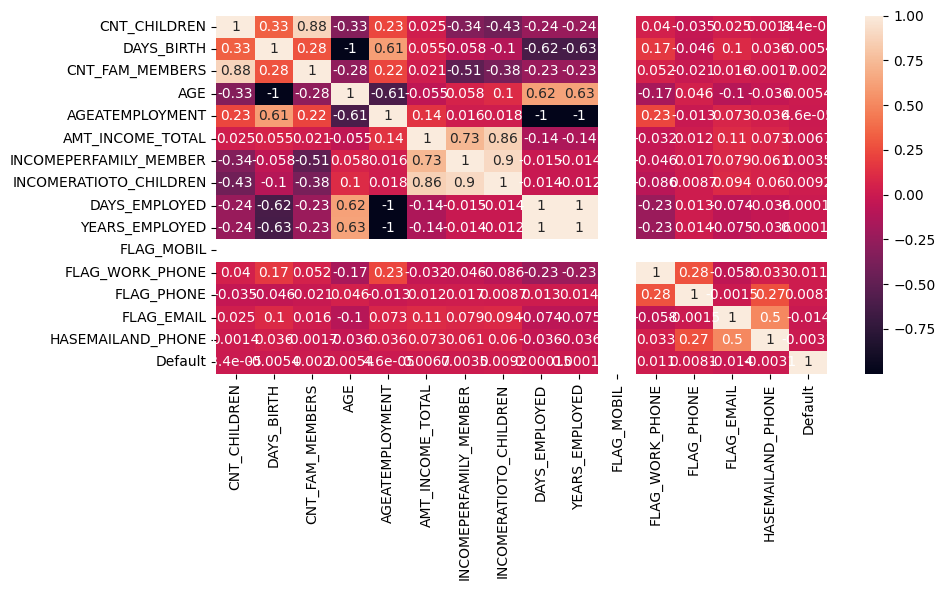

In [91]:
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(df.select_dtypes('number').corr(), annot=True)
plt.show()

### Coeficiente de Cramer (para variáveis categóricas) para identificar relações não lineares

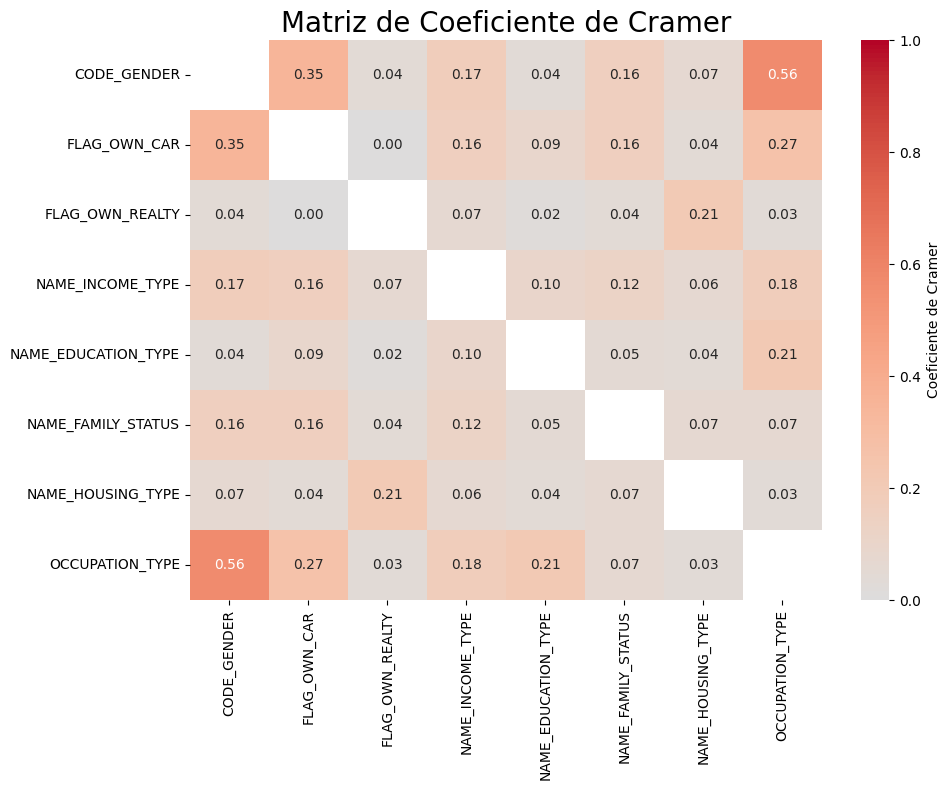

In [92]:
# Função para calcular o coeficiente de Cramer
def cramer_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_stat = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2_stat / (n * k))

# Calcular o coeficiente de Cramer para todas as combinações de variáveis categóricas
categorical_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

# Criar uma matriz de coeficientes
cramer_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for i in range(len(categorical_columns)):
    for j in range(len(categorical_columns)):
        if i != j:
            var1 = categorical_columns[i]
            var2 = categorical_columns[j]
            cramer_matrix.iloc[i, j] = cramer_v(df[var1], df[var2])
        else:
            cramer_matrix.iloc[i, j] = np.nan  # Diagonal principal

# Converter os valores para float
cramer_matrix = cramer_matrix.astype(float)

# Plotar a matriz de correlação de Cramer
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', center=0, vmin=0, vmax=1, fmt='.2f', 
            cbar_kws={'label': 'Coeficiente de Cramer'})
plt.title('Matriz de Coeficiente de Cramer')
plt.show()

### Explicação:
1. **Função `cramer_v`:** Calcula o coeficiente de Cramer para duas variáveis categóricas.
2. **Matriz de Coeficientes:** Calcula o coeficiente de Cramer para todas as combinações de variáveis categóricas e armazena os resultados em uma matriz.
3. **Plotagem:** Usa `seaborn` para criar um heatmap da matriz de coeficientes de Cramer, com anotações, uma barra de cor e uma escala de cores que vai de 0 a 1.

## Visualização

In [97]:
df.shape[0] / 2

47513.5

In [98]:
df.head(47513).to_clipboard()

In [99]:
df.tail(47514).to_clipboard()

# ✨ Insights ✨

Agora compreendemos melhor os dados que temos à nossa disposição para podermos realizar análises mais precisas, levando em consideração todas as nuances relativas aos dados, para obter os melhore Insights.

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/02%20Algoritmos%2C%20modelos%20e%20m%C3%A9tricas/Credit%20Card%20Approval%20Prediction/image/Capa.png" alt="capa">

---

# **Machine Learning** • Credit Card Approval Prediction

Finalmente, aqui estamos no auge da nossa análise, o momento em que partimos para encontrar os insights que estão presos nos dados e trazê-los à tona. Além disso, depois de encontrá-los, temos que entendê-los e conectá-los ao contexto de onde se originam.

---

# Como a análise será realizada:

### **`Nossos objetivos`**

<ol type="1">
  <li>-----------</li>
</ol>

---

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/1.jpg" alt="capa" width="100">

#### [Enzo Schitini](www.linkedin.com/in/enzoschitini)
#### Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/Group%201321314401.png" alt="capa" width="55">

 Meu nome é Enzo Schitini, tenho 19 anos. Sou cientista e analista de dados com Python, especialista no desenvolvimento de aplicações Web/Mobile com Bubble, além de planejar e criar interfaces UX & Ui.

Normalmente, para cada projeto que faço, tento usar essas três habilidades (Data Science, Bubble e UX & Ui) juntas, assim consigo por exemplo desenvolver:

- Storytelling com dados usando UX e UI
- Aplicações Data Driven
- Sites, aplicativos e platafosmas web
- Modelos de Machine Learning (Classificação, Classificação e Clusterização)
- Extrair insights dos dados e realizar análises profundas (análises descritivas, diagnósticas, preditivas, e até prescritivas)
- Sistemas que oferecem visualização e interfaces avançadas
- Plataformas de gerenciamento de dados

E muito mais, combinando o melhor dos três mundos. 

Desde os 12 anos, quando estudei robótica, adoro desenvolver softwares. Sempre valorizei o aprendizado prático, com projetos que me ensinaram que depois de horas de dedicação, comprometimento e muita paciência (coisas que fazem parte do processo) é possível alcançar um objetivo.

Hoje, anos depois, muitas coisas mudaram, mas a vontade de desafiar a minha criatividade e ir cada vez mais longe continua viva. 🔥